# Mall customer Segmentation
Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EDA

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:xlabel='Age', ylabel='Density'>

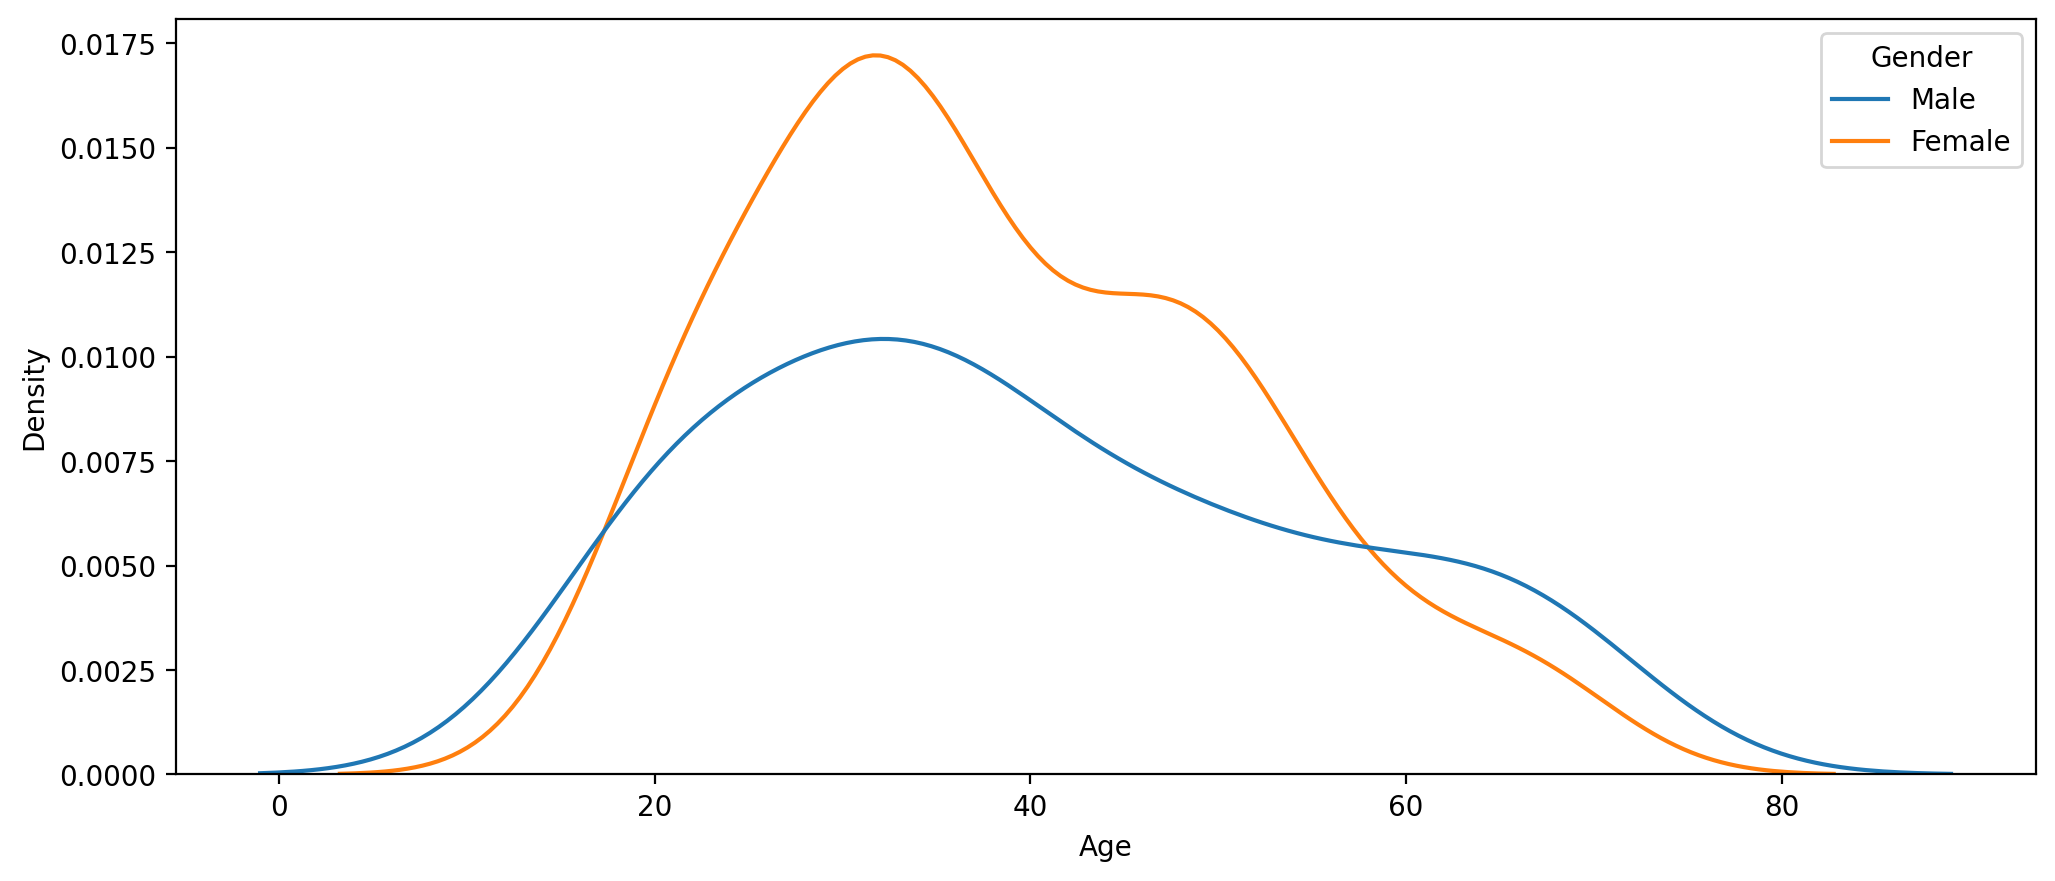

In [31]:
plt.figure(figsize=(12,5),dpi=200)
sns.kdeplot(data=df,x='Age',hue='Gender')

Female has more shopping then Male

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

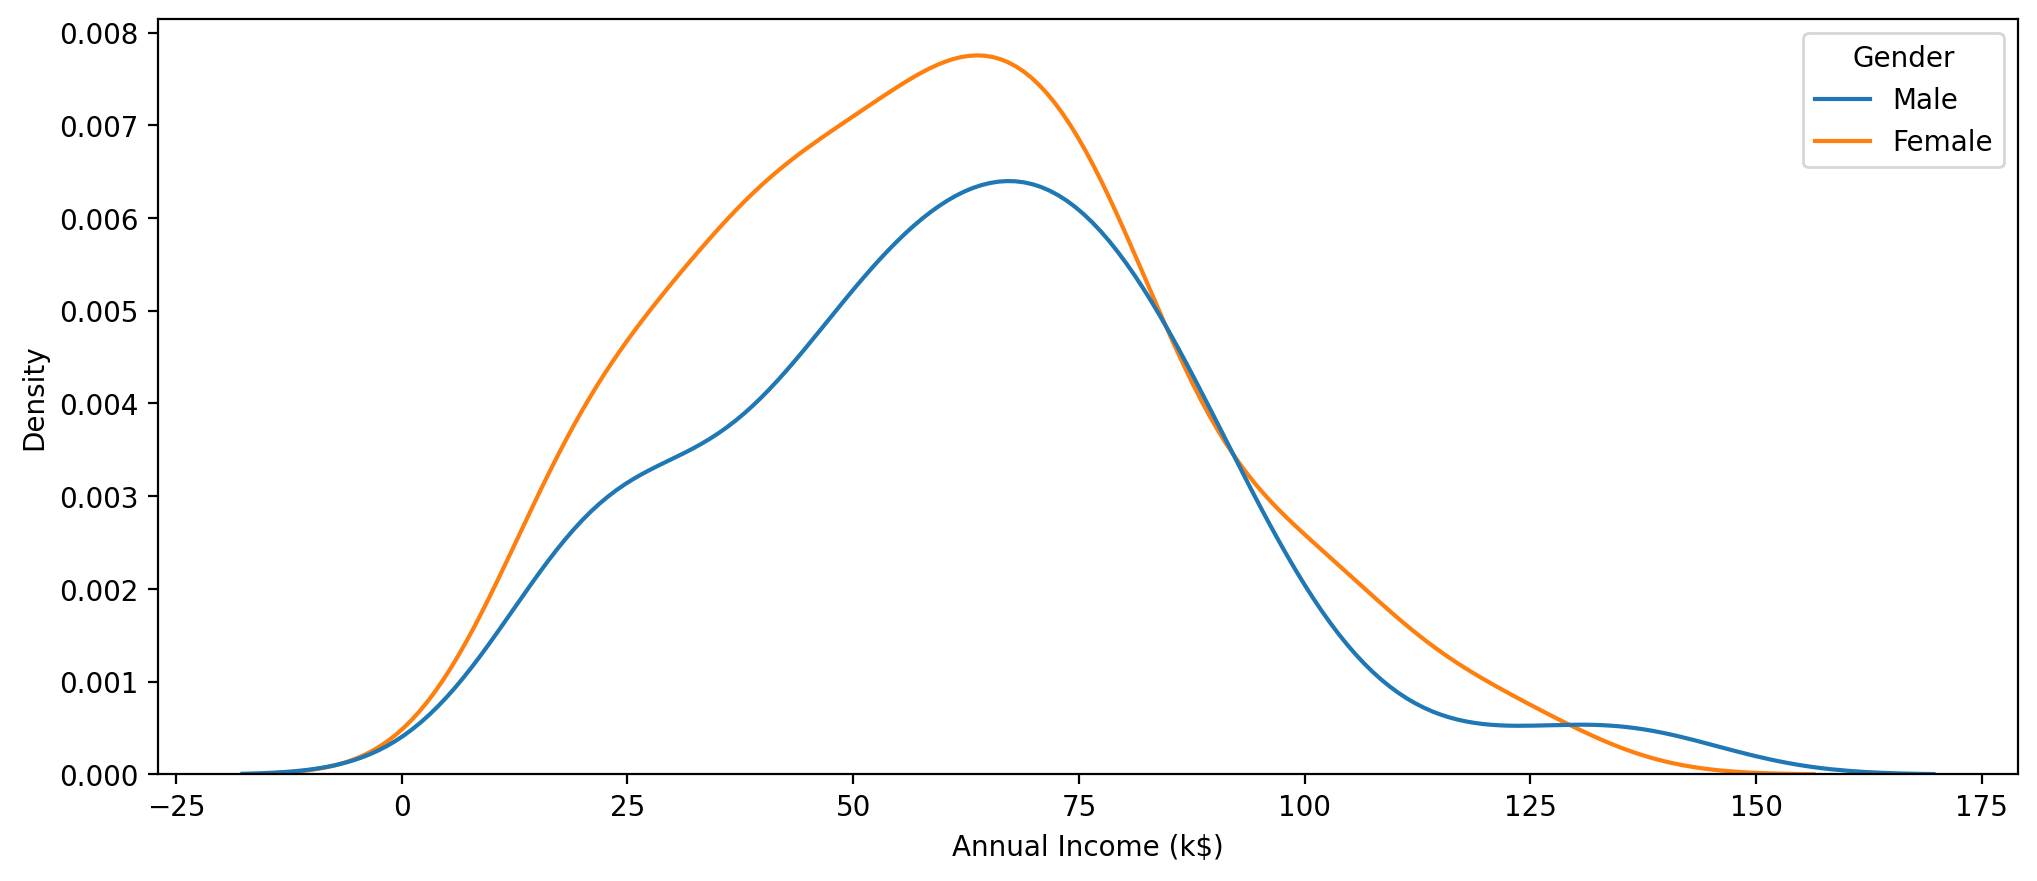

In [35]:
plt.figure(figsize=(12,5),dpi=200)
sns.kdeplot(data=df,x='Annual Income (k$)',hue='Gender')

Female has more income then Male

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

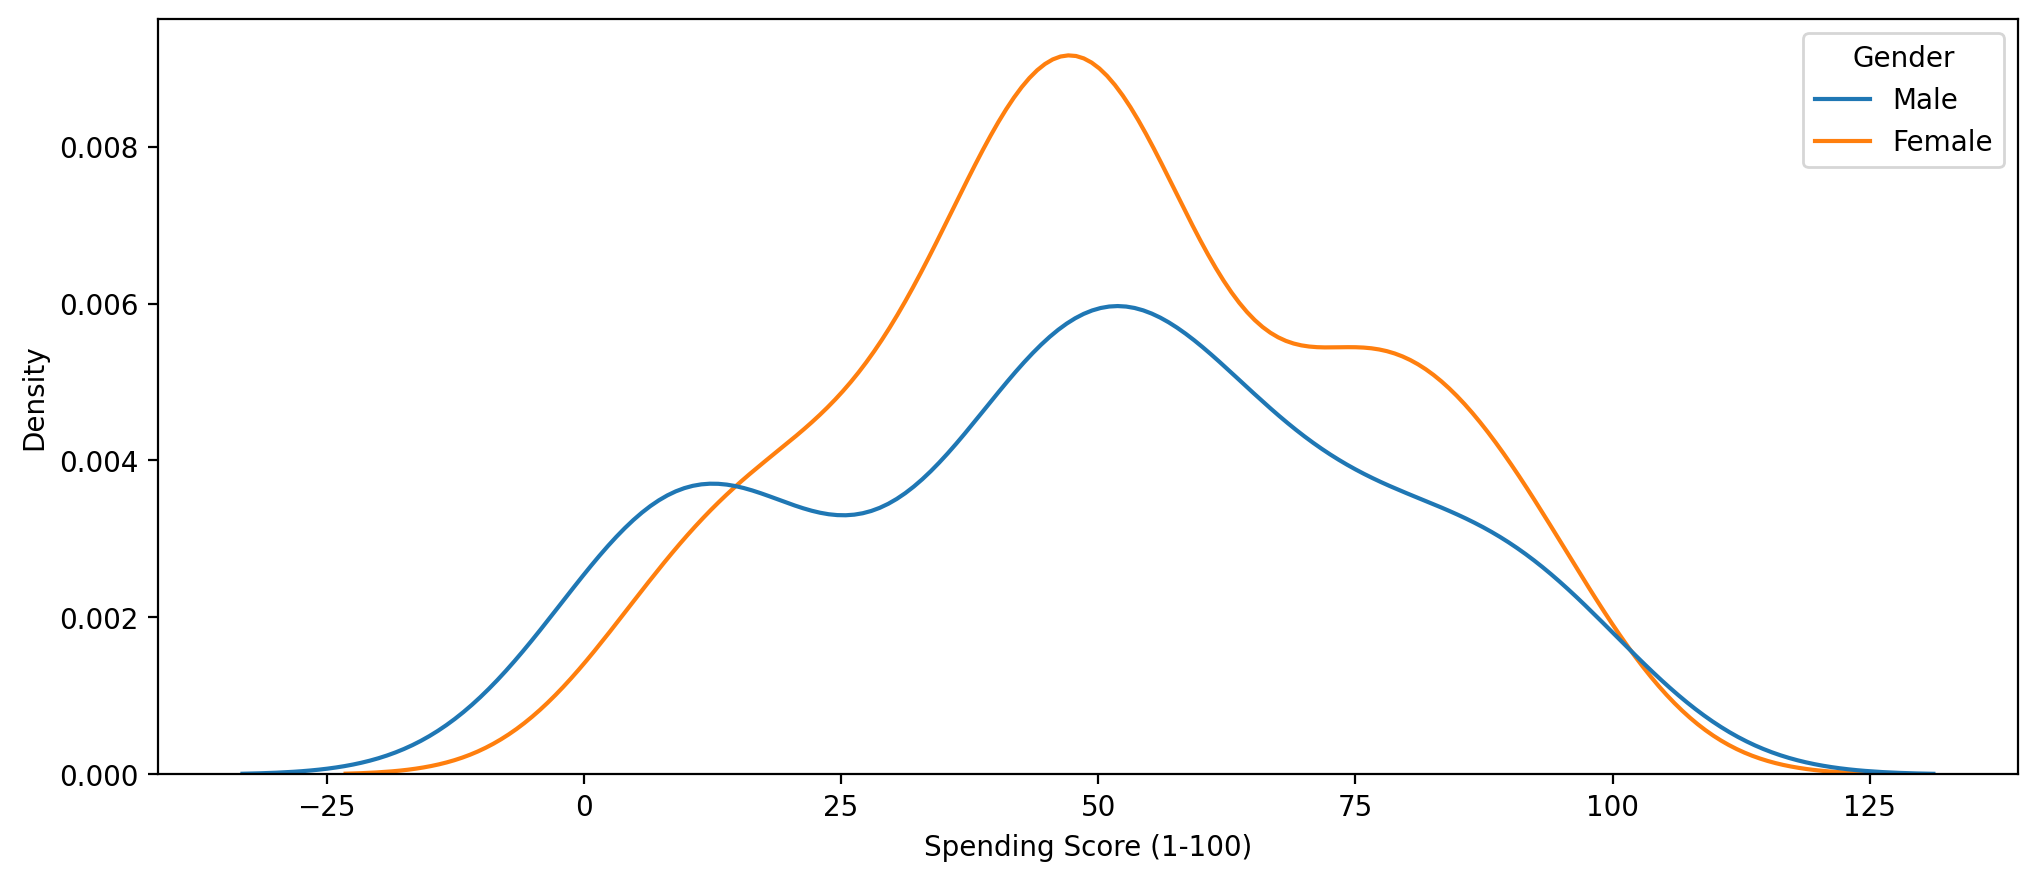

In [40]:
plt.figure(figsize=(12,5),dpi=200)
sns.kdeplot(data=df,x='Spending Score (1-100)',hue='Gender')

Female has more income as well as more Spending Score

# Data Preparing 

In [3]:
X = df.drop('CustomerID',axis=1)

In [4]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# one hot encoding

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter)

In [5]:
X = pd.get_dummies(X,drop_first=True)

In [6]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


1 is Male and 0 in Female

# Feature Scalling Standerdization

in general, attribute scaling is important to be applied with K-means. Most of the time, the standard Euclidean distance is used (as a distance function of K-means) with the assumption that the attributes are normalized. ... But the answer is mainly based on the similarity/dissimilarity function you used in k-means

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scale = StandardScaler()

In [9]:
scaled_X = scale.fit_transform(X)

In [10]:
scaled_X = pd.DataFrame(data=scaled_X,columns=X.columns)

In [11]:
scaled_X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


# Model Training

In [12]:
from sklearn.cluster import KMeans

In [13]:
model = KMeans()

In [14]:
cluster = model.fit_predict(scaled_X)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>

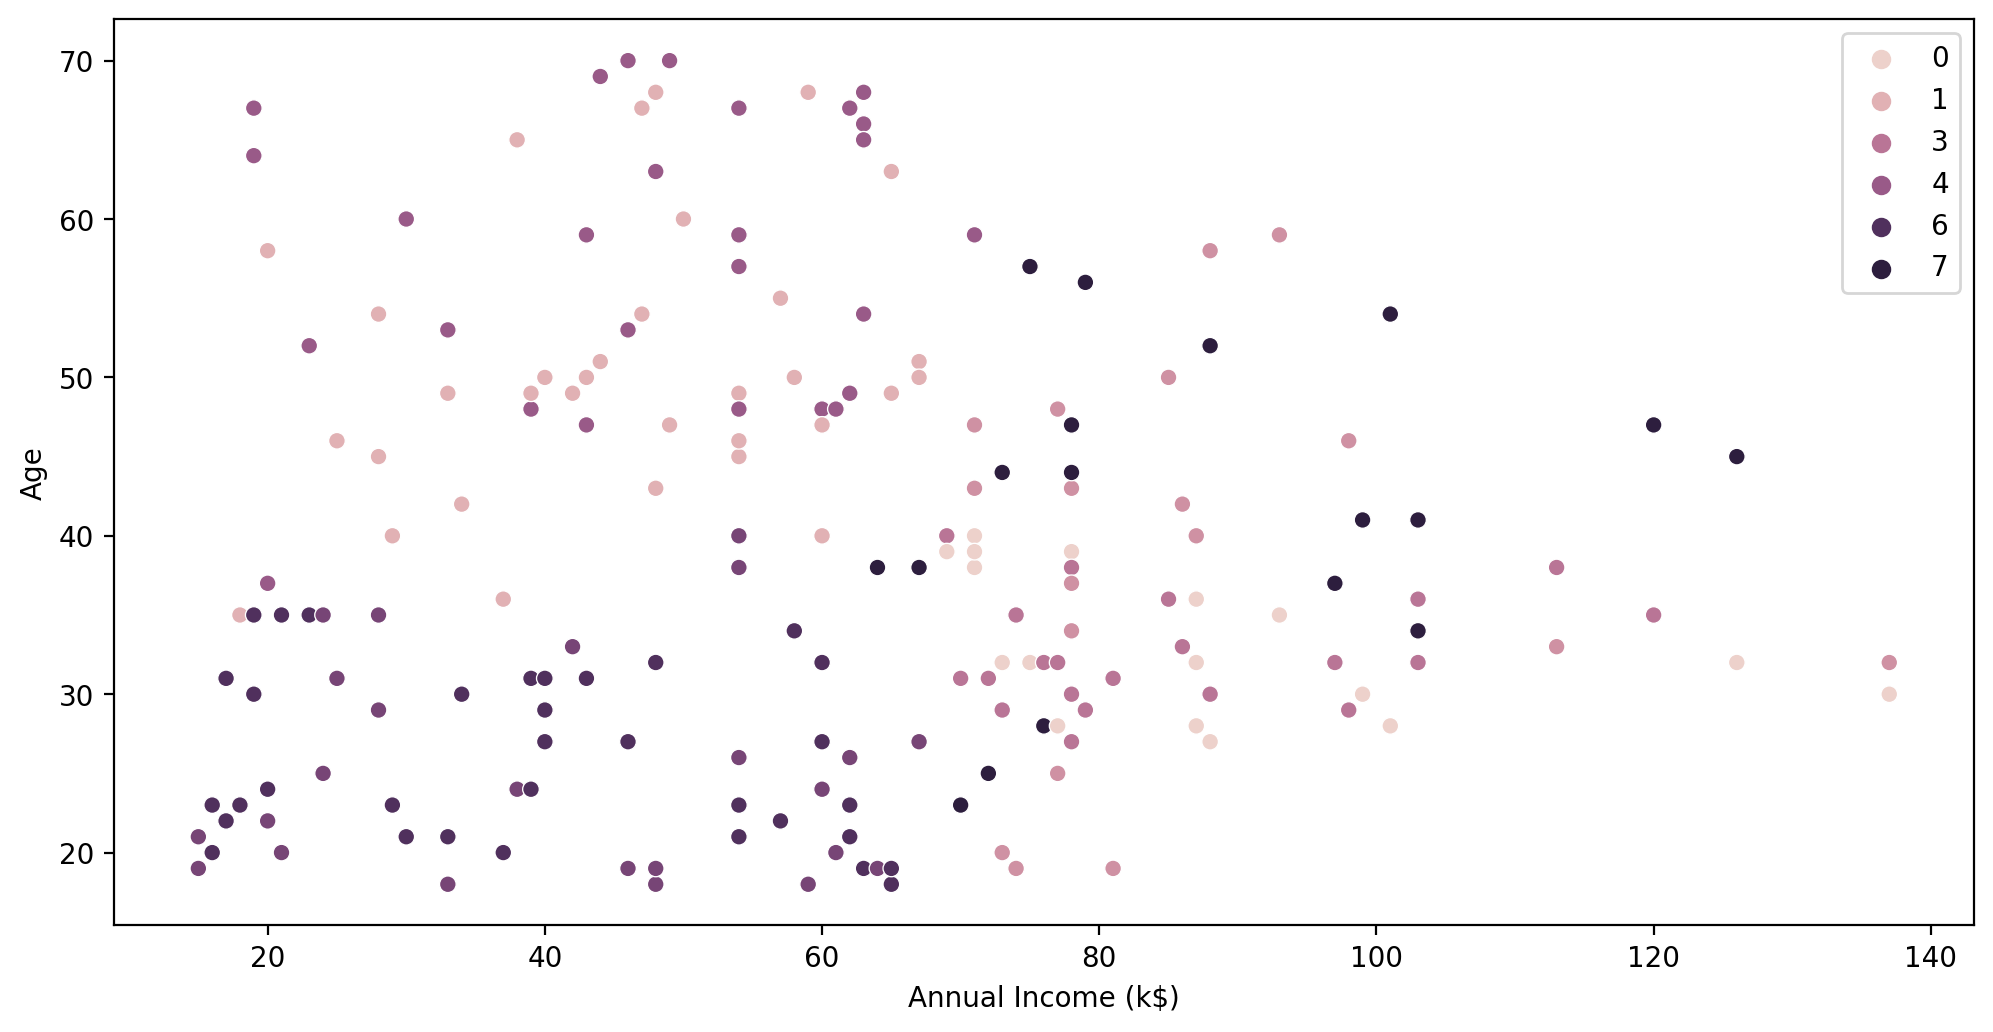

In [15]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=df,x='Annual Income (k$)',y='Age',hue=cluster)

# let's find Reasonable K value using elbow Method

There are some concepts we need to unerstand in oreder to perform elbow method.let first Understand what is Inertia 

# K-Means: Inertia
Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

distance between each data point and its centroid calculated by SSD

# SSD -  sum of squared errors
SSE is calculated by squaring each points distance to its respective clusters centroid and then summing everything up
k-means k-medoids. K-means clustering uses the sum of squared errors (SSE) E=k∑i=1∑p∈Ci(p−mi)2 (with k clusters, C the set of objects in a cluster, m the center point of a cluster) after each iteration to check if SSE is decreasing, until reaching the local minimum/optimum

In [83]:
SSD = []

for k in range(2,10):
    # traning the model
    model = KMeans(n_clusters=k)
    model.fit_predict(scaled_X)
    SSD.append(model.inertia_) 

Text(0, 0.5, 'sum of squared errors')

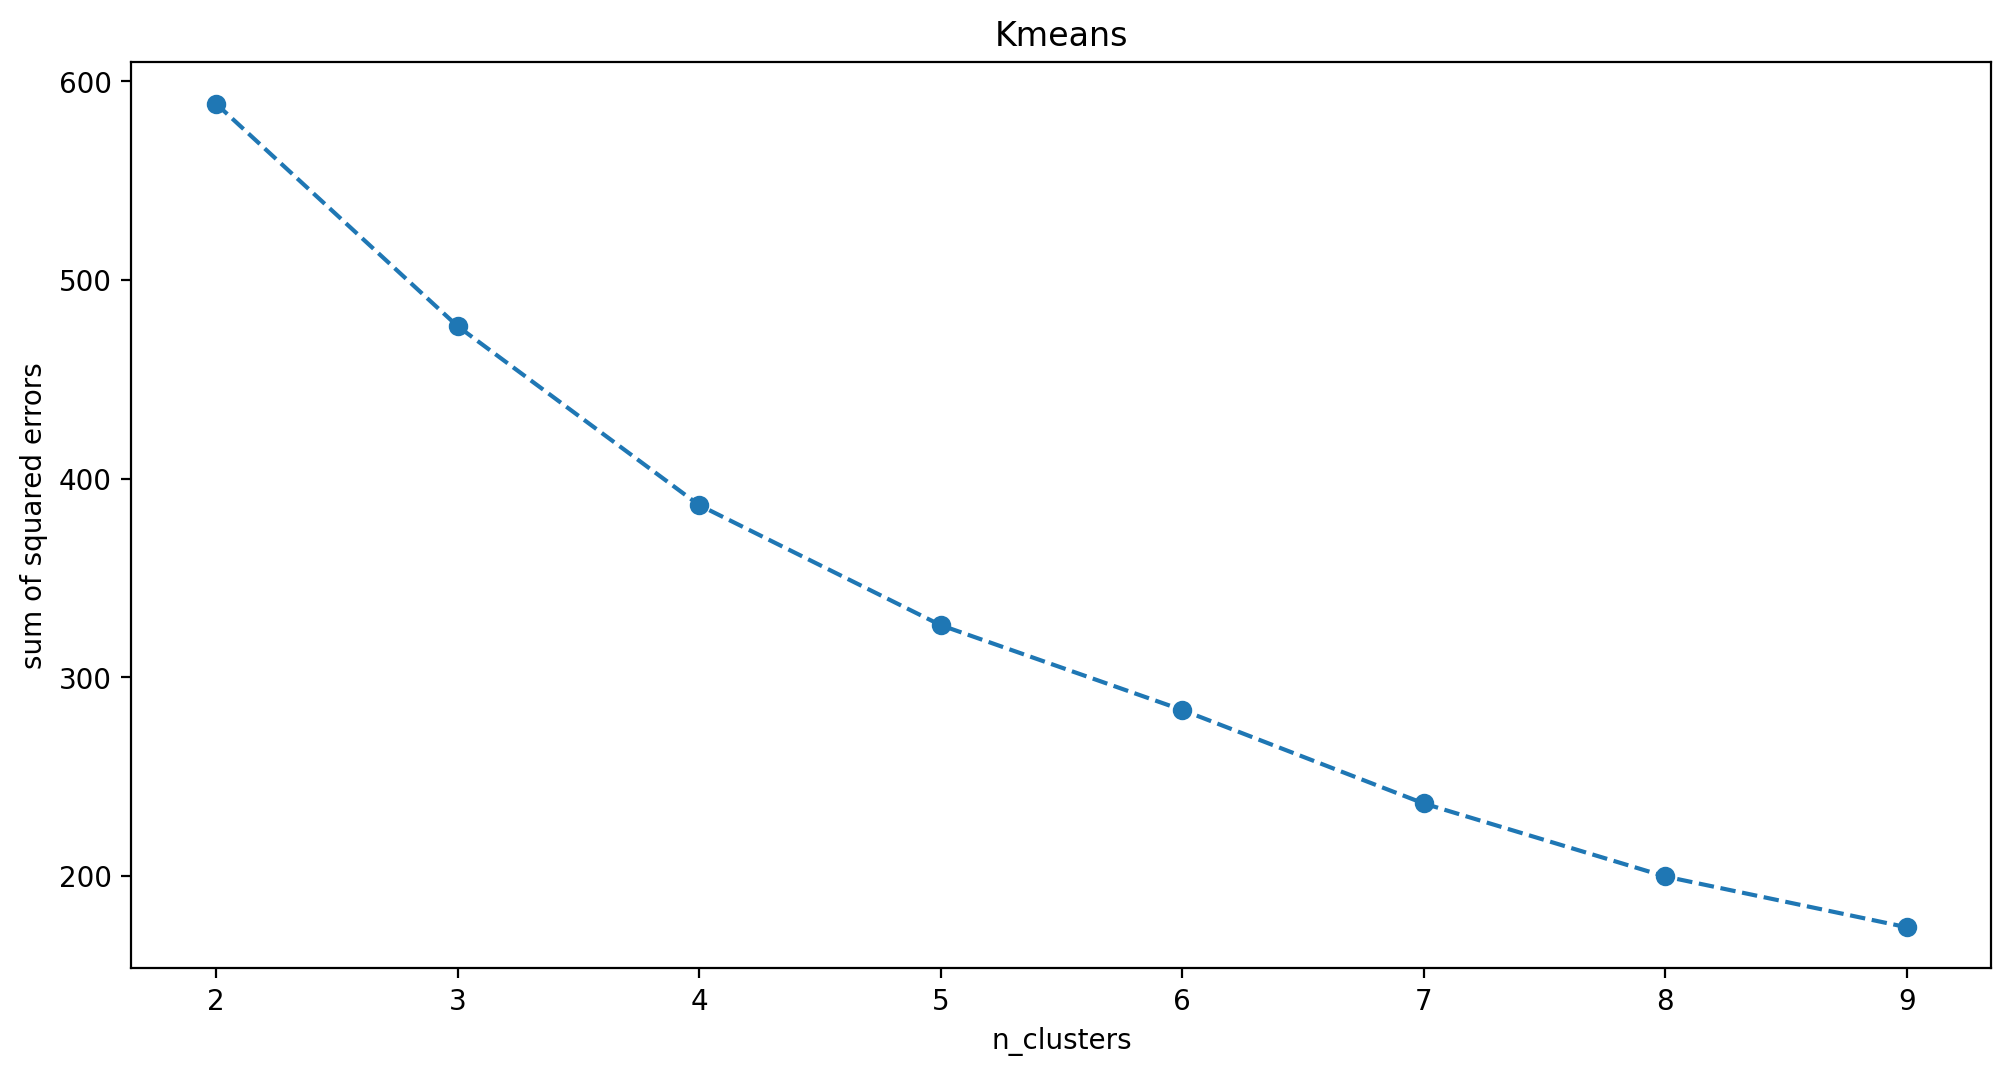

In [86]:
plt.figure(figsize=(12,6),dpi=200)
plt.plot(range(2,10),SSD,'o--')
plt.title('Kmeans')
plt.xlabel('n_clusters')
plt.ylabel('sum of squared errors')

# let's train Model with 4 cluster 

In [16]:
model = KMeans(n_clusters=4)

In [17]:
cluster = model.fit_predict(scaled_X)

Text(0.5, 1.0, 'two cluster')

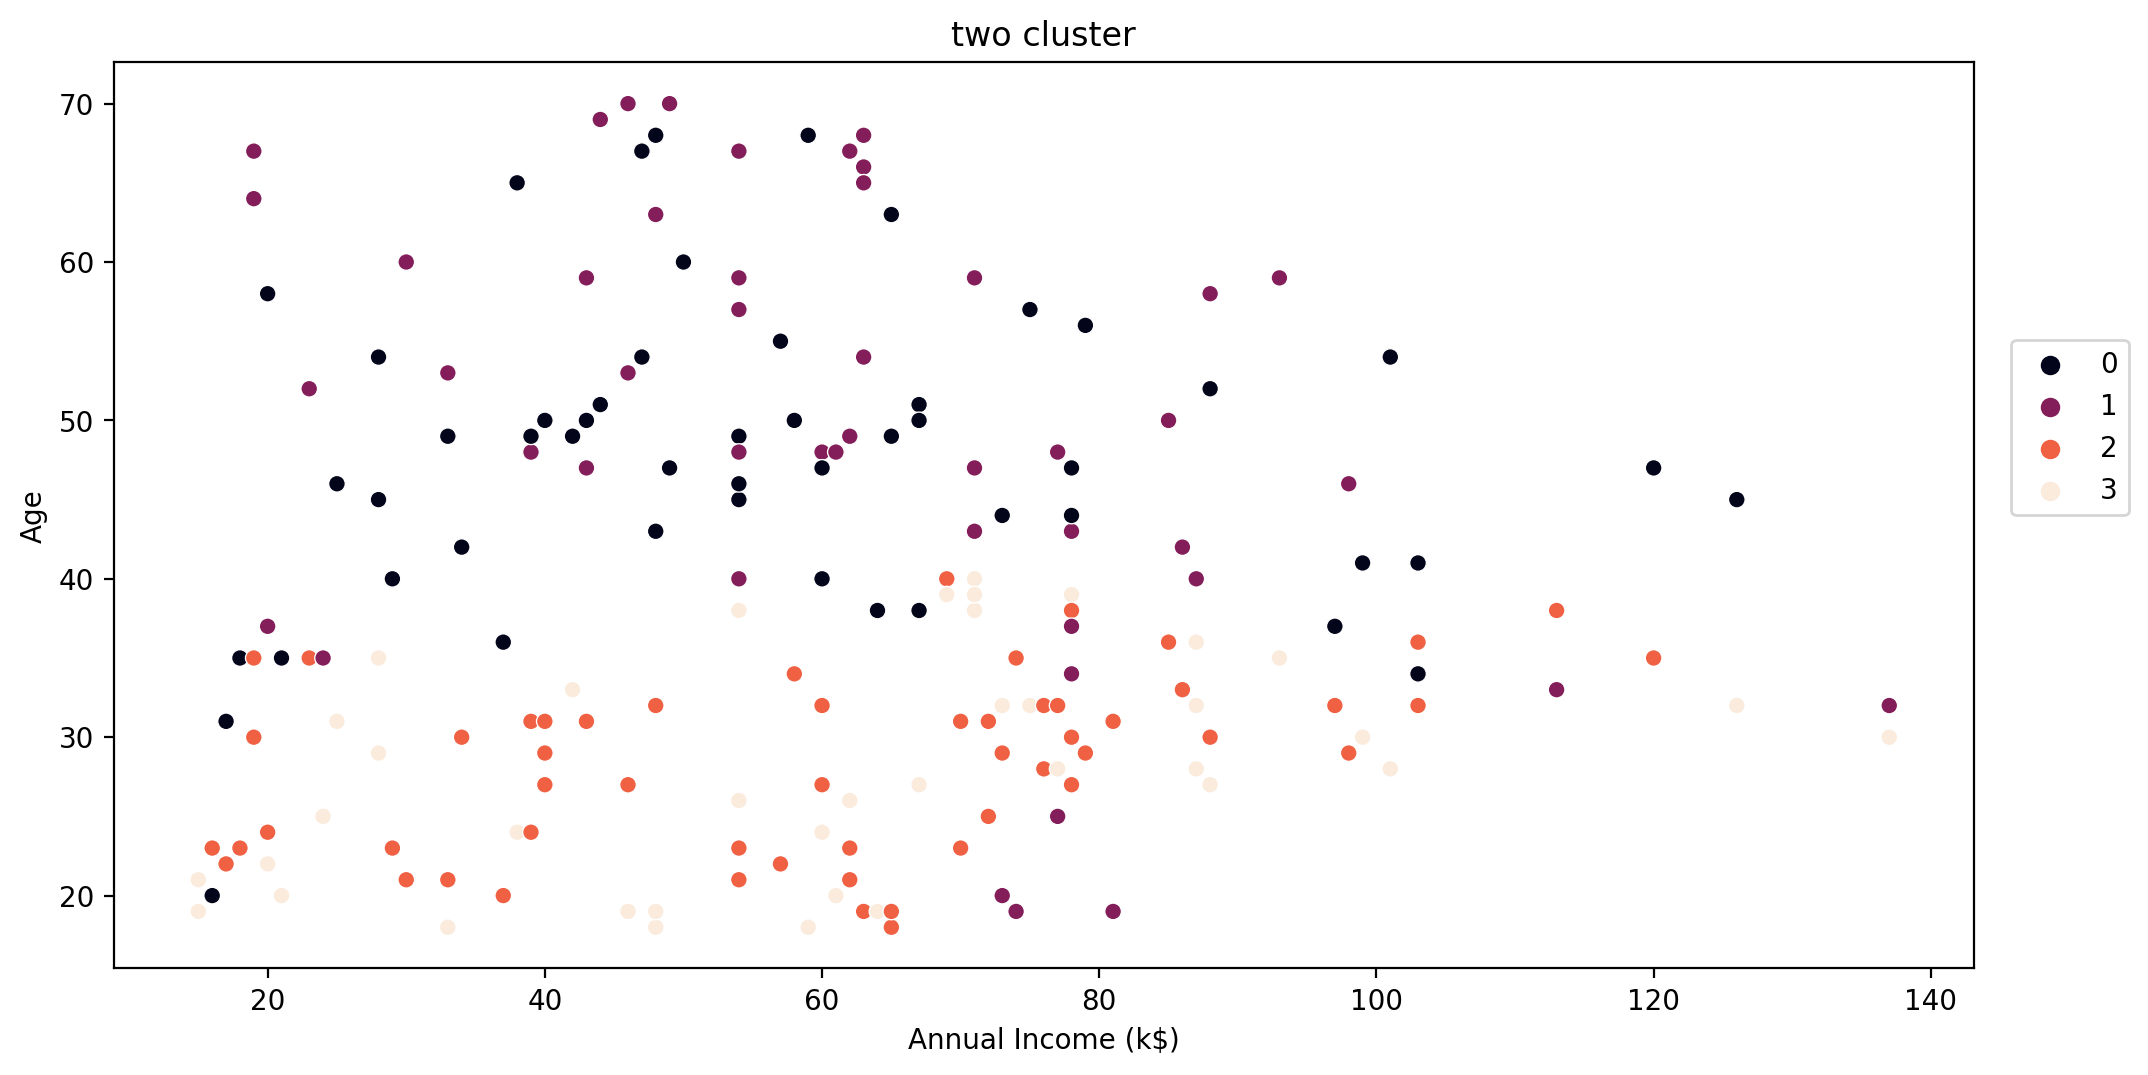

In [18]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=df,x='Annual Income (k$)',y='Age',hue=cluster,palette='rocket')
plt.legend(loc=(1.02,0.5))
plt.title('two cluster')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

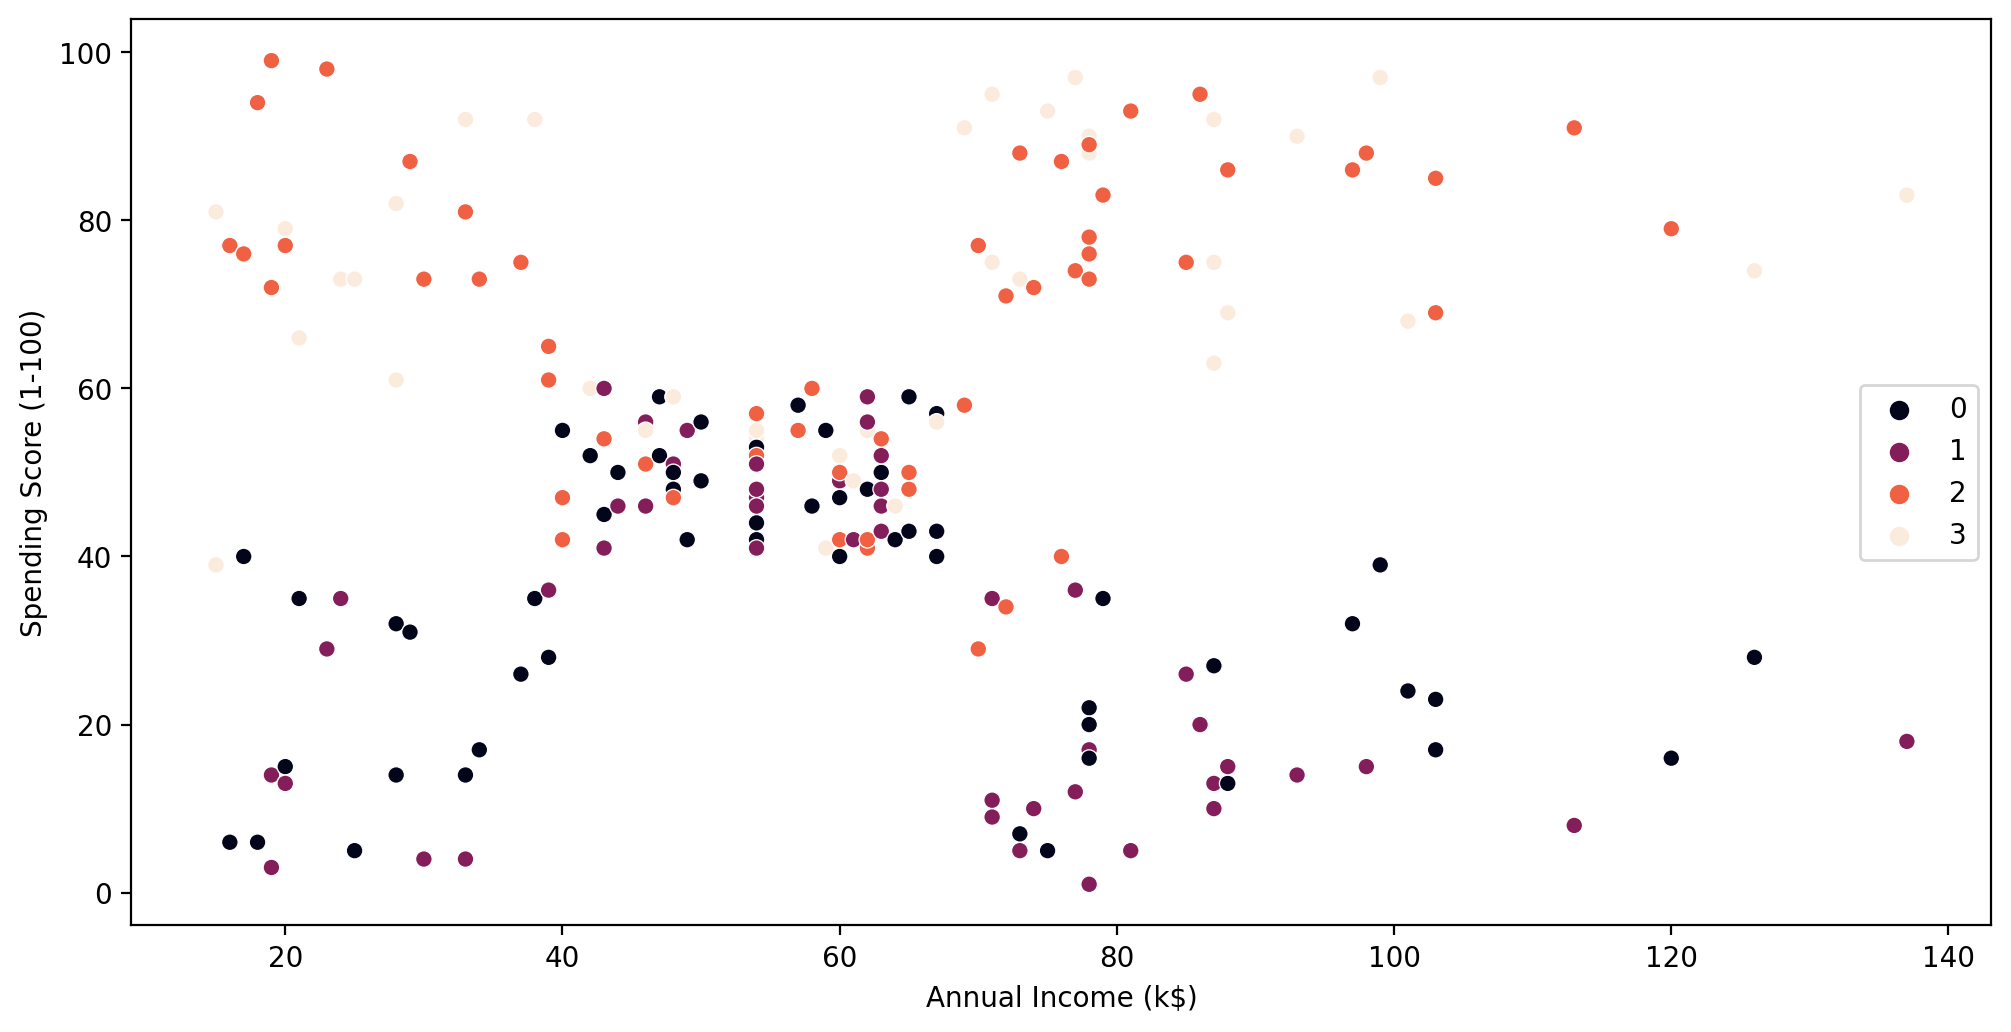

In [19]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue=cluster,palette='rocket')

#### Well the insights of the clusters we can understant here but i made a web-app where i explain all insights of cluster through power bi Dashboard so check below link for interpretation of clusters

# adding clusters to datafream and save as csv for powerbi

In [21]:
df['cluster'] = cluster

In [22]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [24]:
df.to_csv('powerbi_Mall_segmentation_data.csv')